In [148]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as pplot
import matplotlib.gridspec as grdspc
import seaborn as sbn
import itertools
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/AmritCheema/Documents/School/Ryerson/CKME 136/creditcard.csv")

In [3]:
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.22

In [4]:
#this table shows no missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
print("Fraud statistics")
print(df.Time[df.Class == 1].describe())

Fraud statistics
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [6]:
print("Fraud statistics")
print(df.Amount[df.Class == 1].describe())

Fraud statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [7]:
print("Normal statistics")
print(df.Time[df.Class == 0].describe())

Normal statistics
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


In [8]:
print("Normal statistics")
print(df.Amount[df.Class == 0].describe())

Normal statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0, 0.5, 'Frequency')

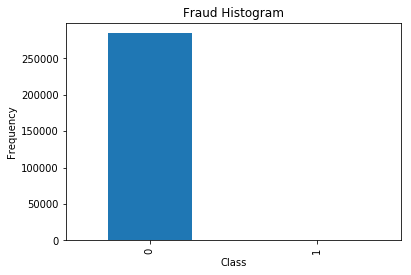

In [9]:
hist = pd.value_counts(df['Class'], sort = True).sort_index()
hist.plot(kind = 'bar')
pplot.title("Fraud Histogram")
pplot.xlabel("Class")
pplot.ylabel("Frequency")

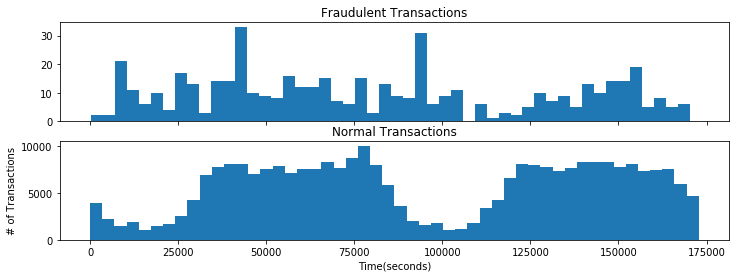

In [10]:
f, (ax1, ax2) = pplot.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(df.Time[df.Class == 1], bins = 50)
ax1.set_title("Fraudulent Transactions")
ax2.hist(df.Time[df.Class == 0], bins = 50)
ax2.set_title("Normal Transactions")

pplot.xlabel("Time(seconds)")
pplot.ylabel("# of Transactions")
pplot.show()

In [14]:
features = df.iloc[:,1:29].columns

C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


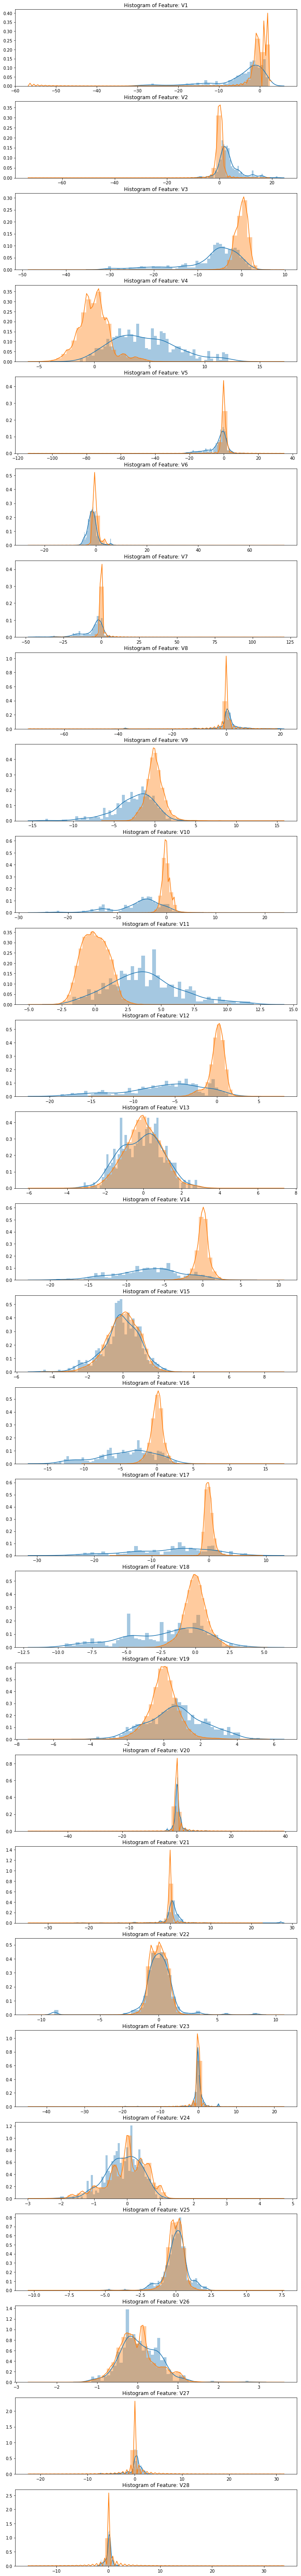

In [12]:
#Plot to show the differences in the key features
pplot.figure(figsize = (12,28*4))
gs = grdspc.GridSpec(28, 1)
for i, cn in enumerate(df[features]):
    ax = pplot.subplot(gs[i])
    sbn.distplot(df[cn][df.Class == 1], bins = 50)
    sbn.distplot(df[cn][df.Class == 0], bins = 50)
    ax.set_xlabel("")
    ax.set_title("Histogram of Feature: " + str(cn))
pplot.show()

In [18]:
#Now we are going to resample the data to undersample the normal transactions
X = df.iloc[:, df.columns != 'Class']
Y = df.iloc[:, df.columns == 'Class']

In [28]:
#Data points in the fraud class
fraud_records = len(df[df.Class == 1])
fraud_indices = np.array(df[df.Class == 1].index)

#Random indices in the normal class equal to fraud class
normal_indices = df[df.Class == 0].index
random_normal_indices = np.random.choice(normal_indices, fraud_records, replace = False)
random_normal_indices = np.array(random_normal_indices)

In [33]:
#Appending the two indices to have our new data set
undersampled_indices = np.concatenate([fraud_indices, random_normal_indices])

In [41]:
undersampled_data = df.iloc[undersampled_indices, :]
X_undersampled = undersampled_data.iloc[:, undersampled_data.columns != 'Class']
Y_undersampled = undersampled_data.iloc[:, undersampled_data.columns == 'Class']

In [45]:
print("Percentage of normal transactions: ", (len(undersampled_data[undersampled_data.Class == 0])/len(undersampled_data))*100, "%")
print("Percentage of fraud transactions: ", (len(undersampled_data[undersampled_data.Class == 1])/len(undersampled_data))*100, "%")
print("Total number of transactions in undersampled data: ", len(undersampled_data))

Percentage of normal transactions:  50.0 %
Percentage of fraud transactions:  50.0 %
Total number of transactions in undersampled data:  984


In [56]:
#Splitting whole dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)
print("For entire dataset:")
print("Number of transactions in train dataset: ", len(X_train))
print("Number of transactions in test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train) + len(X_test))

#Splitting undersampled dataset into training and testing datasets
X_train_undersampled, X_test_undersampled, Y_train_undersampled, Y_test_undersampled = train_test_split(X_undersampled, Y_undersampled, test_size = 0.3, random_state = 0)
print("")
print("For undersampled dataset:")
print("Number of transactions in train dataset: ", len(X_train_undersampled))
print("Number of transactions in test dataset: ", len(X_test_undersampled))
print("Total number of transactions: ", len(X_train_undersampled) + len(X_test_undersampled))

For entire dataset:
Number of transactions in train dataset:  199364
Number of transactions in test dataset:  85443
Total number of transactions:  284807

For undersampled dataset:
Number of transactions in train dataset:  688
Number of transactions in test dataset:  296
Total number of transactions:  984


In [143]:
    def printing_Kfold_scores(x_train_df, y_train_df):
        fold = KFold(n_splits = 5, shuffle = False)
    
        c_parameter_range = [0.01, 0.1, 1, 10, 100]
    
        results_table = pd.DataFrame(index = range(len(c_parameter_range), 2), columns = ['C Parameter', 'Mean Recall Score'])
        results_table['C Parameter'] = c_parameter_range
        results = []
    
        #k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
        j = 0
        for c_parameter in c_parameter_range:
            print("")
            print("C parameter: ", c_parameter)
            print("")
            
            recall_accs = []
            #for iteration, indices in enumerate(fold.split(X_undersampled, Y_undersampled), start = 1):
            for iteration, (train, test) in enumerate(fold.split(x_train_df, y_train_df), start = 1):
            
                #Call the logistic regression model with a certain C parameter
                lr = LogisticRegression(C = c_parameter, penalty = 'l1')
            
                #Use training data to fit the model
                lr.fit(x_train_df.iloc[train], y_train_df.iloc[train].values.ravel())
            
                #Predict values using the test indices in the training data
                y_pred_undersampled = lr.predict(x_train_df.iloc[test].values)
            
                recall_acc = recall_score(y_train_df.iloc[test].values, y_pred_undersampled)
                recall_accs.append(recall_acc)
                print('Iteration ', iteration, ': recall score = ', recall_acc)
            
            #We want to observe the mean value of the iterations
            results.append(np.mean(recall_accs))
            results_table.loc[j,"Mean recall score"] = np.mean(recall_accs)
            j += 1
            print("")
            print("Mean recall score ", np.mean(recall_accs))
            print("")
        
        best_c = max(results)
        print("")
        print("Best model to choose from cross validation is with the accuracy of = ", best_c)
        print("")
    
        return best_c

In [146]:
best_c = printing_Kfold_scores(X_train, Y_train)


C parameter:  0.01



C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.47761194029850745


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.5616438356164384


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.6333333333333333


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.5692307692307692


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  5 : recall score =  0.425

Mean recall score  0.5333639756958096


C parameter:  0.1



C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.582089552238806


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.6438356164383562


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.6833333333333333


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.5846153846153846


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  5 : recall score =  0.5125

Mean recall score  0.6012747773251761


C parameter:  1



C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.5671641791044776


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.6301369863013698


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.7333333333333333


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.6153846153846154


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  5 : recall score =  0.5625

Mean recall score  0.6217038228247592


C parameter:  10



C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.5522388059701493


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.6301369863013698


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.7333333333333333


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.6153846153846154


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  5 : recall score =  0.5625

Mean recall score  0.6187187481978935


C parameter:  100



C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.5522388059701493


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  2 : recall score =  0.6301369863013698


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.7333333333333333


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  4 : recall score =  0.6153846153846154


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  5 : recall score =  0.5625

Mean recall score  0.6187187481978935


Best model to choose from cross validation is with the accuracy of =  0.6217038228247592



In [147]:
best_c = printing_Kfold_scores(X_train_undersampled, Y_train_undersampled)


C parameter:  0.01

Iteration  1 : recall score =  0.8082191780821918
Iteration  2 : recall score =  0.821917808219178
Iteration  3 : recall score =  0.864406779661017
Iteration  4 : recall score =  0.8918918918918919
Iteration  5 : recall score =  0.8939393939393939

Mean recall score  0.8560750103587343


C parameter:  0.1

Iteration  1 : recall score =  0.8356164383561644
Iteration  2 : recall score =  0.863013698630137


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AmritCheema\AppData\Local\P

Iteration  3 : recall score =  0.9661016949152542
Iteration  4 : recall score =  0.918918918918919
Iteration  5 : recall score =  0.8939393939393939

Mean recall score  0.8955180289519736


C parameter:  1

Iteration  1 : recall score =  0.8493150684931506
Iteration  2 : recall score =  0.863013698630137
Iteration  3 : recall score =  0.9830508474576272
Iteration  4 : recall score =  0.9459459459459459


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  5 : recall score =  0.8939393939393939

Mean recall score  0.907052990893251


C parameter:  10

Iteration  1 : recall score =  0.8767123287671232
Iteration  2 : recall score =  0.863013698630137


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.9830508474576272
Iteration  4 : recall score =  0.9459459459459459
Iteration  5 : recall score =  0.8939393939393939

Mean recall score  0.9125324429480454


C parameter:  100



C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  1 : recall score =  0.8767123287671232
Iteration  2 : recall score =  0.863013698630137


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  3 : recall score =  0.9830508474576272
Iteration  4 : recall score =  0.9459459459459459


C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration  5 : recall score =  0.8939393939393939

Mean recall score  0.9125324429480454


Best model to choose from cross validation is with the accuracy of =  0.9125324429480454



In [150]:
def plot_confusion_matrix(cm, classes, normalize = False, title = "Confusion Matrix", cmap = pplot.cm.Reds):
    pplot.imshow(cm, interpolation = 'nearest', cmap=cmap)
    pplot.title(title)
    pplot.colorbar()
    tick_marks = np.arange(len(classes))
    pplot.xticks(tick_marks, classes, rotation = 0)
    pplot.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    else:
        1
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pplot.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j]> thresh else "black")
    
    pplot.tight_layout()
    pplot.ylabel('True label')
    pplot.xlabel('Predicted label')

C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset (undersampled):  0.8979591836734694
Precision metric in the testing dataset (undersampled):  0.9777777777777777


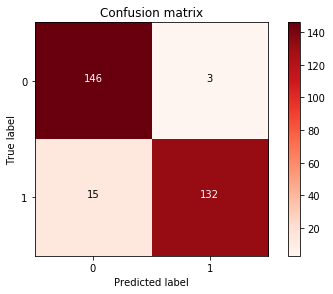

In [161]:
lr = LogisticRegression(C = 100, penalty = "l1")
lr.fit(X_train_undersampled, Y_train_undersampled.values.ravel())
y_pred_undersampled = lr.predict(X_test_undersampled.values)

cnf_matrix = confusion_matrix(Y_test_undersampled, y_pred_undersampled)
np.set_printoptions(precision = 2)

print("Recall metric in the testing dataset (undersampled): ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision metric in the testing dataset (undersampled): ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
class_names = [0,1]
pplot.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title = "Confusion matrix")
pplot.show()

C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset (whole data set):  0.6190476190476191
Precision metric in the testing dataset (whole data set):  0.883495145631068


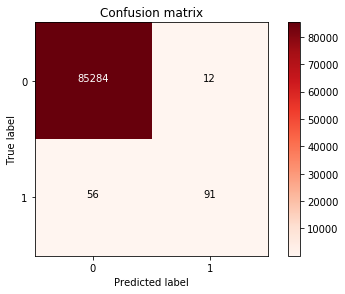

In [156]:
lr = LogisticRegression(C = 100, penalty = "l1")
lr.fit(X_train, Y_train.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision = 2)

print("Recall metric in the testing dataset (whole data set): ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision metric in the testing dataset (whole data set): ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
class_names = [0,1]
pplot.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title = "Confusion matrix")
pplot.show()

C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset (whole data set):  0.8979591836734694
Precision metric in the testing dataset (whole data set):  0.0468417317246274


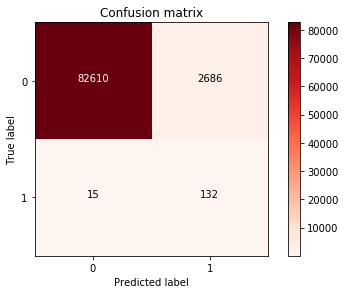

In [157]:
#Whole data set using the model of the undersampled dataset
lr = LogisticRegression(C = 100, penalty = "l1")
lr.fit(X_train_undersampled, Y_train_undersampled.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision = 2)

print("Recall metric in the testing dataset (whole data set): ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Precision metric in the testing dataset (whole data set): ", cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1]))
class_names = [0,1]
pplot.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title = "Confusion matrix")
pplot.show()

C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


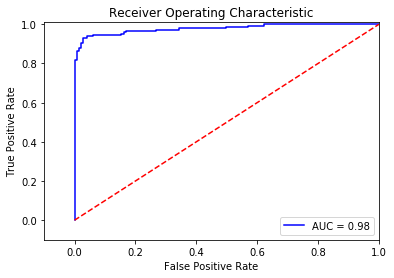

In [159]:
#ROC Curve
lr = LogisticRegression(C = 100, penalty = "l1")
y_pred_undersampled_score = lr.fit(X_train_undersampled, Y_train_undersampled.values.ravel()).decision_function(X_test_undersampled.values)

fpr, tpr, thresholds = roc_curve(Y_test_undersampled.values.ravel(),y_pred_undersampled_score)
roc_auc = auc(fpr,tpr)

#Plot the ROC Curve
pplot.title("Receiver Operating Characteristic")
pplot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
pplot.legend(loc = 'lower right')
pplot.plot([0,1],[0,1],'r--')
pplot.xlim([-0.1,1.0])
pplot.ylim([-0.1,1.01])
pplot.ylabel('True Positive Rate')
pplot.xlabel('False Positive Rate')
pplot.show()

C:\Users\AmritCheema\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


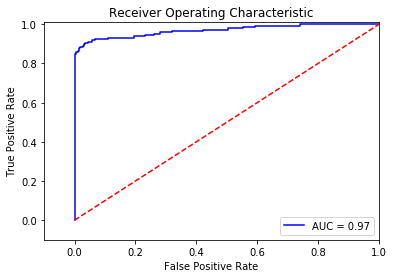

In [160]:
#ROC Curve with the whole dataset
lr = LogisticRegression(C = 100, penalty = "l1")
y_pred_score = lr.fit(X_train, Y_train.values.ravel()).decision_function(X_test.values)

fpr, tpr, thresholds = roc_curve(Y_test.values.ravel(),y_pred_score)
roc_auc = auc(fpr,tpr)

#Plot the ROC Curve
pplot.title("Receiver Operating Characteristic")
pplot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
pplot.legend(loc = 'lower right')
pplot.plot([0,1],[0,1],'r--')
pplot.xlim([-0.1,1.0])
pplot.ylim([-0.1,1.01])
pplot.ylabel('True Positive Rate')
pplot.xlabel('False Positive Rate')
pplot.show()